<a href="https://colab.research.google.com/github/wasurocks/PowerStats/blob/main/Descriptive_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Calculates statistical values and plot graphs for Probability and Statistics (2182203)**

####Imports and functions

In [ ]:
#@title
# Imports required libraries
import statistics
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict

In [ ]:
#@title
# Define functions

# Gets quartile of list
def get_quartile(quartile, data_list):
  quartile_percent_dict = { 1: 25, 2: 50, 3: 75, 4: 100 }
  percentile = get_percentile(quartile_percent_dict[quartile], data_list)
  return percentile

# Gets percentile of list
def get_percentile(percentile, data_list):
  p_idx = get_percentile_idx(percentile, len(data_list))
  number = math.floor(p_idx)
  fraction = p_idx - math.floor(p_idx)
  forward_diff = data_list[number] - data_list[number - 1]
  percentile = data_list[number - 1] + (fraction * forward_diff)
  return percentile

# Accepts 0 to 100
def get_percentile_idx(percentile, n):
  return (n + 1) * (percentile / 100)

# Get multimode
def get_multimode(data_list):
  res = []
  data_list1 = Counter(data_list) 
  temp = data_list1.most_common(1)[0][1] 
  for ele in data_list:
    if data_list.count(ele) == temp:
      res.append(ele)
  res = list(set(res))
  return res

####Data Input/Validation

In [ ]:
# Raw information (PASTE HERE)
raw_list = [111,85,83,98,107,101,100,94,101,86,105,122,104,106,90,123,102,107,93,109,141,86,91,88,98,128,93,114,87,116,99,94,94,106,136,102,75,96,78,116,107,106,68,104,91,87,105,97,110,91,107,107,85,117,93,108,91,110,105,99,85,99,99,96,160]
print(raw_list)

[111, 85, 83, 98, 107, 101, 100, 94, 101, 86, 105, 122, 104, 106, 90, 123, 102, 107, 93, 109, 141, 86, 91, 88, 98, 128, 93, 114, 87, 116, 99, 94, 94, 106, 136, 102, 75, 96, 78, 116, 107, 106, 68, 104, 91, 87, 105, 97, 110, 91, 107, 107, 85, 117, 93, 108, 91, 110, 105, 99, 85, 99, 99, 96, 160]


In [ ]:
#@title
# The list gets sorted and counted
sorted_list = sorted(raw_list)
print(sorted_list)
print("Data contains " + str(len(sorted_list)) + " values")

[68, 75, 78, 83, 85, 85, 85, 86, 86, 87, 87, 88, 90, 91, 91, 91, 91, 93, 93, 93, 94, 94, 94, 96, 96, 97, 98, 98, 99, 99, 99, 99, 100, 101, 101, 102, 102, 104, 104, 105, 105, 105, 106, 106, 106, 107, 107, 107, 107, 107, 108, 109, 110, 110, 111, 114, 116, 116, 117, 122, 123, 128, 136, 141, 160]
Data contains 65 values


####Calculation of Values

In [ ]:
#@title
# Calculate mean, median, mode, and range
mean = statistics.mean(sorted_list)
median = statistics.median(sorted_list)
multi_mode = get_multimode(sorted_list)
range = sorted_list[-1] - sorted_list[0]

print("Mean: " + str(round(mean, 4)))
print("Median: " + str(round(median, 4)))
print("Mode: " + str(multi_mode))
print("Range: " + str(round(range, 4)), end=' ')
print("(Max: " + str(sorted_list[-1]) + ", Min: " + str(sorted_list[0]) + ")")

Mean: 101.4154
Median: 100
Mode: [107]
Range: 92 (Max: 160, Min: 68)


In [ ]:
#@title
# Calculate variance and stdev
n = len(sorted_list)
variance = (1/n) * sum([(k - mean) ** 2 for k in sorted_list])
st_dev = math.sqrt(variance)

s_variance = (1/(n - 1)) * (sum([k ** 2 for k in sorted_list]) - (n * (mean ** 2)))
s_stdev = math.sqrt(s_variance)

print("Population")
print("Variance: " + str(round(variance, 4)))
print("Stdev: " + str(round(st_dev, 4)))

print("\nSample")
print("Variance: " + str(round(s_variance, 4)))
print("Stdev: " + str(round(s_stdev, 4)))

Population
Variance: 228.9198
Stdev: 15.1301

Sample
Variance: 232.4966
Stdev: 15.2478


In [ ]:
#@title
# Calculate Q1, Q3, IQR 
q1 = get_quartile(1, sorted_list)
q3 = get_quartile(3, sorted_list)
q1_idx = get_percentile_idx(25, len(sorted_list))
q2_idx = get_percentile_idx(50, len(sorted_list))
q3_idx = get_percentile_idx(75, len(sorted_list))
iqr = q3 - q1
right_iqr_highest = max(list(filter(lambda x: x <= q3 + 1.5*iqr, sorted_list)))
left_iqr_lowest = min(list(filter(lambda x: x >= q1 - 1.5*iqr, sorted_list)))

print("Q1: " + str(round(q1, 4)), "(position:", str(q1_idx) +")")
print("Q2: " + str(round(median, 4)), "(position:", str(q2_idx) +")")
print("Q3: " + str(round(q3, 4)), "(position:", str(q3_idx) +")")
print("IQR: " + str(round(iqr, 4)))

# Right section
print("\nRight:")
print("Q3 + 1.5 IQR: " + str(round(q3 + 1.5*iqr, 4)))
print("Q3 + 3 IQR: " + str(round(q3 + 3*iqr, 4)))
print("1.5 IQR highest: " + str(right_iqr_highest))
print("Max-outlier: " + str(sorted_list[-1]))

# Left section
print("\nLeft:")
print("Q1 - 1.5 IQR: " + str(round(q1 - 1.5*iqr, 4)))
print("Q1 - 3 IQR: " + str(round(q1 - 3*iqr, 4)))
print("1.5 IQR lowest outlier: " + str(left_iqr_lowest))
print("Min-outlier: " + str(sorted_list[0]))

Q1: 91.0 (position: 16.5)
Q2: 100 (position: 33.0)
Q3: 107.0 (position: 49.5)
IQR: 16.0

Right:
Q3 + 1.5 IQR: 131.0
Q3 + 3 IQR: 155.0
1.5 IQR highest: 128
Max-outlier: 160

Left:
Q1 - 1.5 IQR: 67.0
Q1 - 3 IQR: 43.0
1.5 IQR lowest outlier: 68
Min-outlier: 68


In [ ]:
# Percentile calculator
percentile = 90
percentile_idx = get_percentile_idx(90, len(sorted_list))
print(get_percentile(percentile, sorted_list), " (position: " + str(percentile_idx) + ")")

119.0  (position: 59.4)


####Raw Frequencies

In [ ]:
# Outputs frequencies of values in list
frequencies = Counter(sorted_list)
for key, value in frequencies.items():
  print(str(key) + ": " + str(value), end='\n-------\n')

####Charts

In [ ]:
#@title
# Plots stem and leaf
tree = defaultdict(list)
for value in sorted_list:
  str_val = str(value).replace(".", "")
  stem = str_val[0:-1]
  tree[stem].append(str_val[-1])

print("Stem and leaf plot")
print("(IMPORTANT! ALWAYS SPECIFY KEY - e.g. key: a|b = 10a + b)")
print("------------------")
for key, value in tree.items():
  print(str(key) + "|" + ','.join([str(k) for k in value]))

Stem and leaf plot
(IMPORTANT! ALWAYS SPECIFY KEY - e.g. key: a|b = 10a + b)
------------------
6|8
7|5,8
8|3,5,5,5,6,6,7,7,8
9|0,1,1,1,1,3,3,3,4,4,4,6,6,7,8,8,9,9,9,9
10|0,1,1,2,2,4,4,5,5,5,6,6,6,7,7,7,7,7,8,9
11|0,0,1,4,6,6,7
12|2,3,8
13|6
14|1
16|0


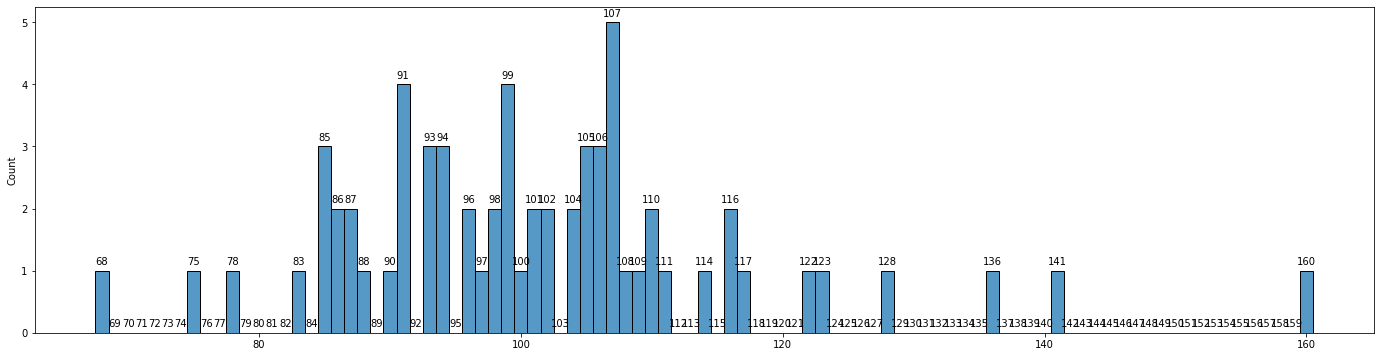

In [ ]:
#@title
# Plots histogram
plt.figure(figsize=(24,6))
splot = sns.histplot(data=sorted_list, stat="count", discrete=True)
for p in splot.patches:
    splot.annotate(str(int(p.get_x() + 0.5)), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 9), 
    textcoords = 'offset points')    
plt.show()

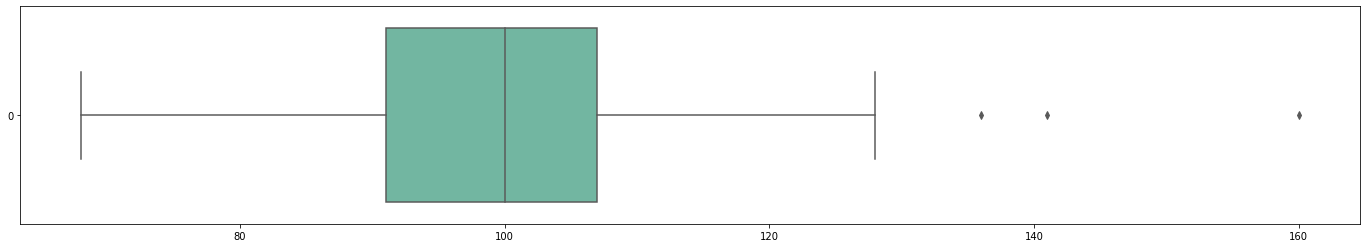

In [ ]:
#@title
# Plots box and whisker
plt.figure(figsize=(24,4))
splot = sns.boxplot(data=sorted_list, orient="h", palette="Set2")
plt.show()

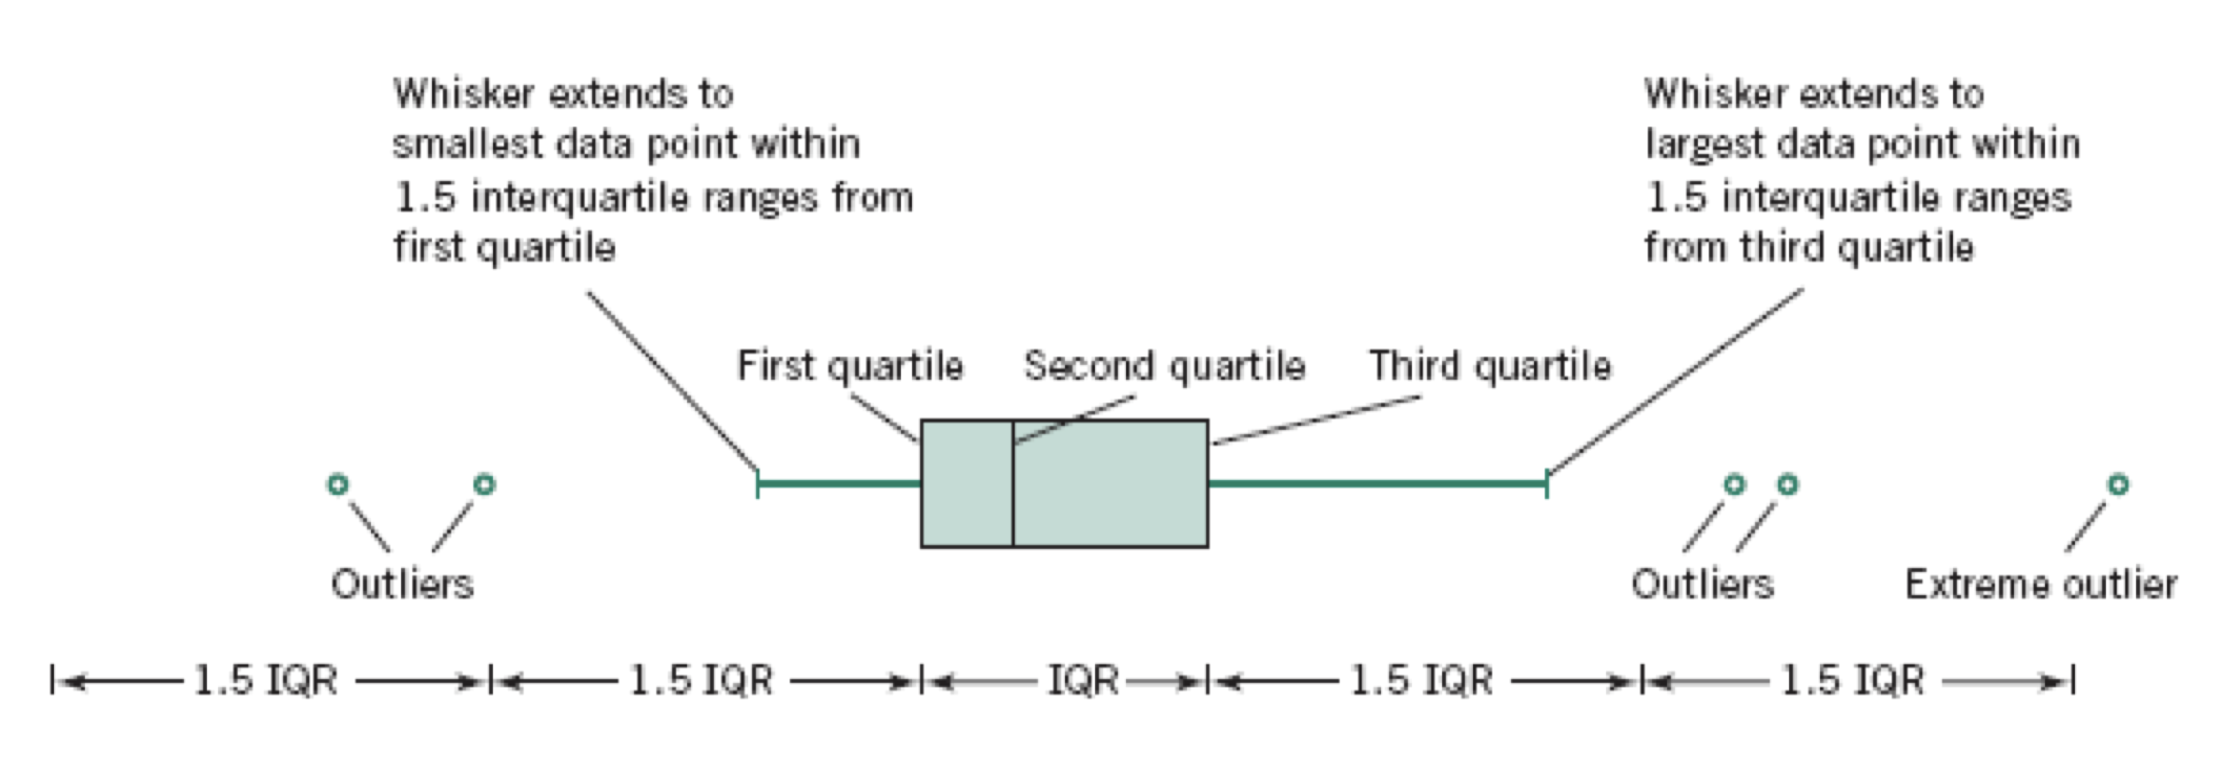